<a href="https://colab.research.google.com/github/ivanightingale/cirquits/blob/master/Fault_tolerant_rotation_(H_%26_T).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qq qiskit

     |████████████████████████████████| 6.7MB 2.6MB/s 
     |████████████████████████████████| 23.3MB 1.6MB/s 
     |████████████████████████████████| 163kB 52.5MB/s 
     |████████████████████████████████| 184kB 51.5MB/s 
     |████████████████████████████████| 1.9MB 48.6MB/s 
     |████████████████████████████████| 962kB 40.5MB/s 
     |████████████████████████████████| 5.8MB 38.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 296kB 51.0MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 583kB 47.2MB/s 
     |████████████████████████████████| 26.0MB 135kB/s 
     |████████████████████████████████| 2.7MB 46.4MB/s 


In [ ]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector

In [ ]:
def fault_tolerant_rotation(qc, qubit, zx):
    if zx:
        # first Rx, then Rz
        qc.h(qubit)
        qc.t(qubit)
        qc.h(qubit)
        qc.t(qubit)
    else:
        # first Rz, then Rx
        qc.t(qubit)
        qc.h(qubit)
        qc.t(qubit)
        qc.h(qubit)
    return qc

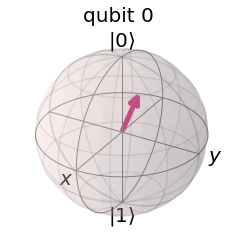

In [ ]:
iter = 5
zx = False

qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
for i in range(0, iter):
        fault_tolerant_rotation(qc, 0, zx)
qc.draw()
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)